In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model


In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize ( 0 to 1)
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255


32-3x3
maxpool(2)
64-3x3
maxpool(2)
64-3x3
Flatten
desne-64
dense-10

Adam

In [4]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


c:\Users\nandi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


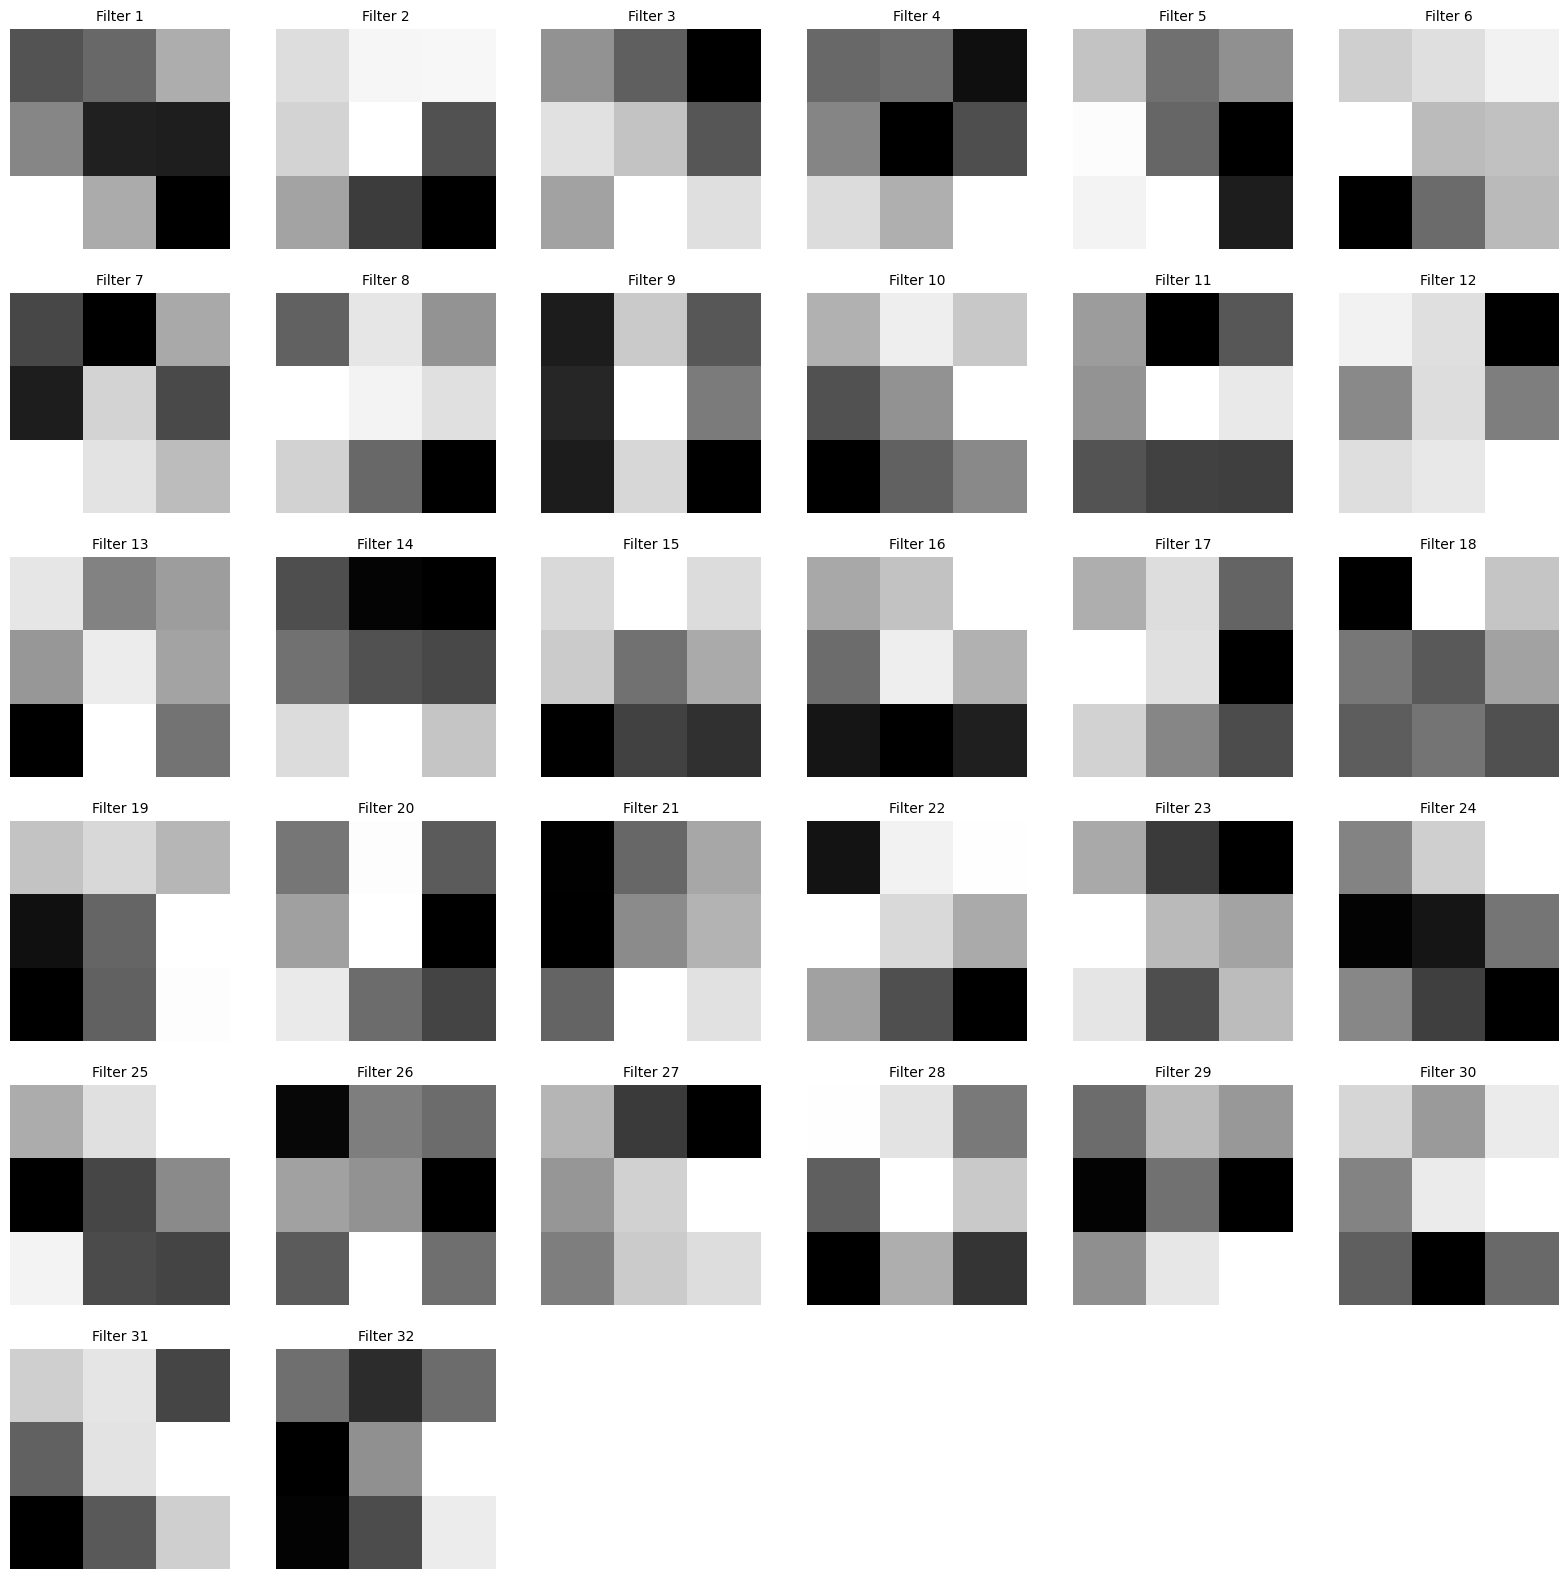

In [36]:
filters, biases = model.layers[0].get_weights()

# Normalize filters to the range 0-1
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

n_filters = 32
n_rows, n_cols = 6, 6  # Define the number of rows and columns for the grid

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 20))  # Adjust figsize as needed

for i in range(n_filters):
    ax = axs[i // n_cols, i % n_cols]
    # Extract the ith filter
    f = filters[:, :, :, i]
    # Display the filter with a grayscale colormap
    ax.imshow(f[:, :, 0], cmap='gray')
    ax.axis('off')
    ax.set_title(f'Filter {i + 1}', fontsize=10)

# Remove empty subplots if n_filters < n_rows * n_cols
for j in range(n_filters, n_rows * n_cols):
    fig.delaxes(axs[j // n_cols, j % n_cols])

plt.show()

In [43]:
import numpy as np

# Get the weights of the first Conv2D layer


print(model.layers[0].get_weights())


[array([[[[-1.53978214e-01,  1.12448737e-01, -2.18458176e-02,
           2.31510773e-02,  9.64102373e-02,  5.37039265e-02,
          -6.26277775e-02, -9.98410061e-02, -6.41424656e-02,
           6.68643266e-02,  6.97509423e-02,  1.04815878e-01,
           1.24743953e-01, -7.30169788e-02,  1.21927530e-01,
           2.69932505e-02,  4.91458885e-02, -1.29412174e-01,
           1.19936407e-01, -5.19355871e-02, -3.20031583e-01,
          -2.05365226e-01,  7.30513930e-02, -1.07636414e-02,
           2.61859205e-02, -8.40443224e-02,  5.64764924e-02,
           1.46135643e-01,  2.87939720e-02,  9.65507254e-02,
           8.46323073e-02,  2.47130897e-02]],

        [[-1.17463872e-01,  1.60909325e-01, -1.59373790e-01,
           2.85268407e-02, -5.99491969e-02,  7.88393244e-02,
          -1.41742051e-01,  1.19394548e-01,  1.34589240e-01,
           1.89509079e-01, -1.25100926e-01,  7.21950457e-02,
           1.94445495e-02, -2.04369575e-01,  1.92259729e-01,
           8.68457854e-02,  1.3252872

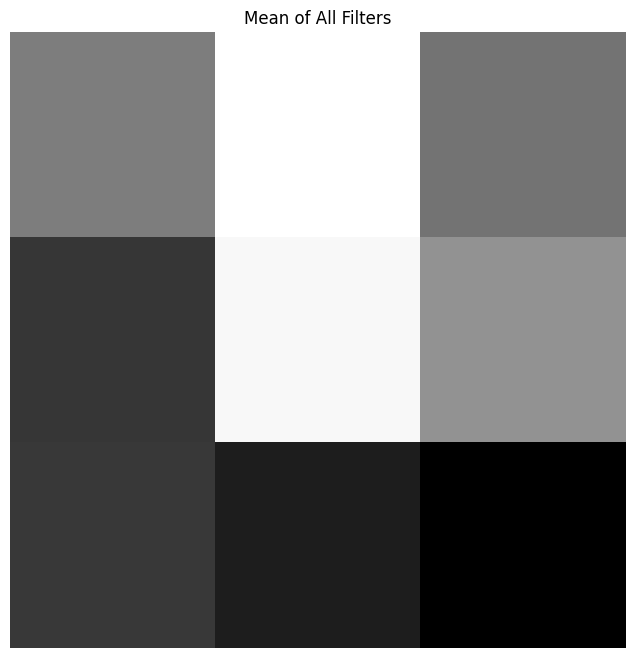

In [38]:
filters, biases = model.layers[0].get_weights()

# Normalize filters to the range 0-1
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# Compute the mean filter across the filter dimension
mean_filter = np.median(filters, axis=-1)

# Since the mean filter might still have multiple channels, reduce to one channel if necessary
mean_filter = mean_filter[:, :, 0]

# Plot the mean filter
plt.figure(figsize=(8, 8))
plt.imshow(mean_filter, cmap='gray')
plt.axis('off')
plt.title('Mean of All Filters')
plt.show()

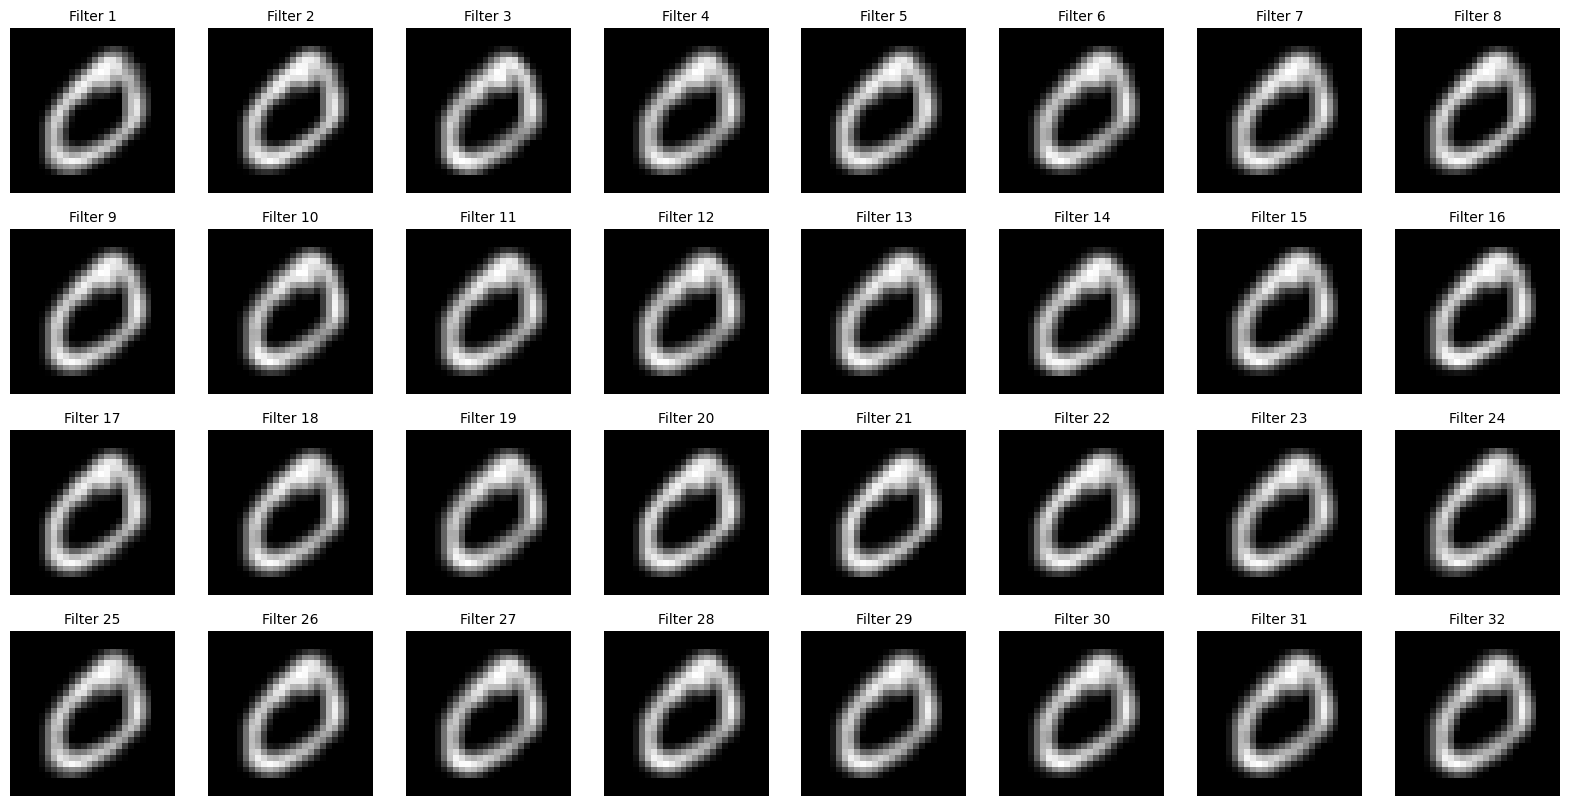

In [33]:
from keras.preprocessing.image import img_to_array

# Assuming filters and biases are already obtained from the model
filters, biases = model.layers[0].get_weights()

# Normalize filters to the range 0-1
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# Create a sample image with all zeros (same dimensions as input)
# For example, if the input shape is (28, 28, 1), use these dimensions
sample_image = train_images[1]  # Adjust the size based on your model's input shape

# Prepare the sample image by adding batch dimension
sample_image_batch = np.expand_dims(sample_image, axis=0)

# Define the number of filters and the grid dimensions
n_filters = filters.shape[-1]
n_rows, n_cols = 4, 8  # Adjust as needed

# Create a figure with subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 10))

for i in range(n_filters):
    ax = axs[i // n_cols, i % n_cols]
    
    # Extract the ith filter
    f = filters[:, :, :, i]
    
    # Apply the filter to the sample image
    # We need to apply the filter to the sample image using convolution
    from scipy.signal import convolve2d
    output_image = np.zeros_like(sample_image)
    
    for j in range(sample_image.shape[2]):  # Iterate over channels (for grayscale it's just one)
        output_image[:, :, j] = convolve2d(sample_image[:, :, j], f[:, :, j], mode='same', boundary='wrap')
    
    # Display the result
    ax.imshow(output_image[:, :, 0], cmap='gray')
    ax.axis('off')
    ax.set_title(f'Filter {i + 1}', fontsize=10)

# Remove empty subplots if n_filters < n_rows * n_cols
for j in range(n_filters, n_rows * n_cols):
    fig.delaxes(axs[j // n_cols, j % n_cols])

plt.show()


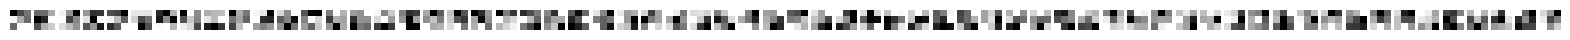

In [28]:
filters, biases = model.layers[2].get_weights()

f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

n_filters = 64
fig, axs = plt.subplots(1, n_filters, figsize=(20, 8))

for i in range(n_filters):
    ax = axs[i]
    # Extract the ith filter
    f = filters[:, :, :, i]
    # Since the filters are for grayscale images, they have only one channel
    ax.imshow(f[:, :, 0], cmap='gray')
    ax.axis('off')
    #ax.set_title(f'Filter {i + 1}')

plt.show()


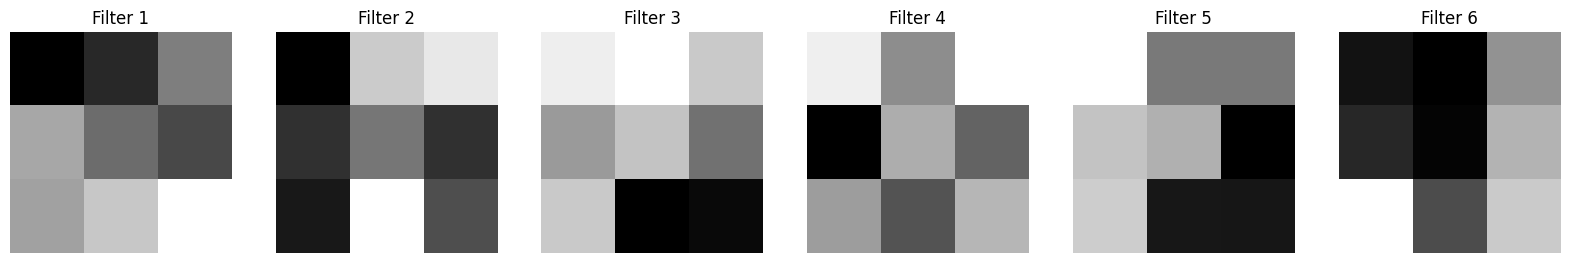

In [19]:
import numpy as np

# Get the weights of the first Conv2D layer
filters, biases = model.layers[4].get_weights()

# Normalize the filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# Plot the first 6 filters
n_filters = 6
fig, axs = plt.subplots(1, n_filters, figsize=(20, 8))

for i in range(n_filters):
    ax = axs[i]
    # Extract the ith filter
    f = filters[:, :, :, i]
    # Since the filters are for grayscale images, they have only one channel
    ax.imshow(f[:, :, 0], cmap='gray')
    ax.axis('off')
    ax.set_title(f'Filter {i + 1}')

plt.show()


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
history = model.fit(train_images, train_labels, epochs=2, 
                    validation_data=(test_images, test_labels))

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8939 - loss: 0.3442 - val_accuracy: 0.9836 - val_loss: 0.0556
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9859 - loss: 0.0459 - val_accuracy: 0.9874 - val_loss: 0.0396


In [8]:
# Print a summary of the model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 279,968 (1.07 MB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 186,646 (729.09 KB)

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 1s - 5ms/step - accuracy: 0.9874 - loss: 0.0396
Test accuracy: 0.9873999953269958


In [10]:
# Display the model architecture image
img = plt.imread('cnn_model.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'cnn_model.png'

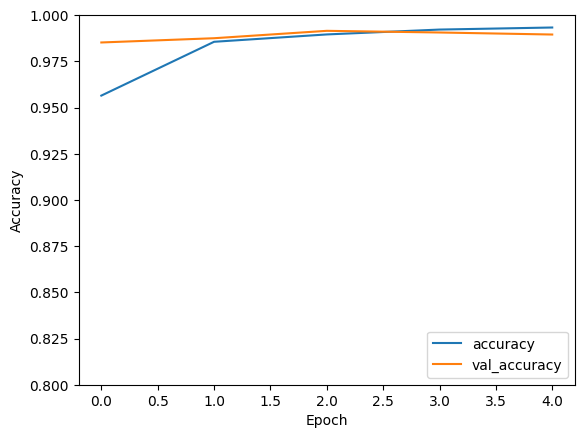

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.show()